We consider a neural network with two inputs, 1 hidden layer with 3 hidden nodes, and one output. We are using the ReLU activation function at the hidden nodes. Mathematically, this can be represented as:

$$
h = \sigma \left( W^T x + b\right), ~~~ z = V^T h + c
$$

where $\sigma$ denotes the ReLU activation and

$~~~~~~~~W =
\begin{bmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23}
\end{bmatrix},~
$
$b =
\begin{bmatrix}
b_{1}\\
b_{2}\\
b_{3}
\end{bmatrix},
$
$V = \begin{bmatrix}
v_{1}  \\
v_{2}\\
v_{3}
\end{bmatrix}$, c

are the weights and the bias of the network. We will denote the output $z$ of this network as $f(\theta, x)$.

For a data point $(x, y)$, the loss function on this data point is defined as
$$
L(\theta, x, y) = [f(\theta, x) - y]^2.
$$

Write a Python function to compute the forward map of the network.

In [ ]:
def relu(x):
  return max(0, x)

def fwd(inp, b, c, x):
  w11, w12, w13, w21, w22, w23, v1, v2, v3 = inp
  b1, b2, b3 = b
  x1, x2 = x
  h1 = relu(w11*x1 + w21*x2 + b1)
  h2 = relu(w12*x1 + w22*x2 + b2)
  h3 = relu(w13*x1 + w23*x2 + b3)

  z  = (v1*h1 + v2 *h2 + v3*h3 + c)

  return [h1,h2,h3,z];

def lxy(inp, b, c, x, y):
  h1,h2,h3,z = fwd(inp, b, c, x)
  loss = ((z-y)**2)
  return loss

Write a Python function to compute the derivative of  𝐿 with respect to all parameters of the network.

In [ ]:
def derelu(x):
  if x > 0:
    return 1
  return 0

def Ltheta(inp, b, c, x, y):
  h1,h2,h3,z = fwd(inp, b, c, x)
  w11, w12, w13, w21, w22, w23, v1, v2, v3 = inp
  b1, b2, b3 = b
  x1, x2 = x
  a = 2*(z-y)
  lv1 = a*h1
  lv2 = a*h2
  lv3 = a*h3

  dh1 = derelu(w11*x1 + w21*x2 + b1)
  dh2 = derelu(w12*x1 + w22*x2 + b2)
  dh3 = derelu(w13*x1 + w23*x2 + b3)

  lw11 = a*x1* v1 * dh1
  lw12 = a*x1* v2 * dh2
  lw13 = a*x1* v3 * dh3
  lw21 = a*x2* v1 * dh1
  lw22 = a*x2* v2 * dh2
  lw23 = a*x2* v3 * dh3

  return [lw11, lw12, lw13, lw21, lw22, lw23, lv1, lv2, lv3]

Consider the dataset of two data points:
*   $x_1 = \begin{bmatrix}
-1 \\
1
\end{bmatrix}$, and $y_1 = 60$.
*   $x_2 = \begin{bmatrix}
-1 \\
0.5
\end{bmatrix}$, and $y_2 = 20$.

Define
$$
J(\theta) = L(\theta, x_1, y_1) + L(\theta, x_2, y_2)$$

Implement the following procedure

*   Start at a random value of $\theta$
*   Perform 100 steps of gradient descent for the objective function $J(\theta)$ with learning rate $\rho = 0.005$
*   Plot the value of the objective function over the steps

(100, 9)
(101, 9)
[ 4.59887459  2.04357507  6.46296789 -0.41125485  0.27335591  4.04587004
 -0.27058879  0.2229246  -2.43870906]


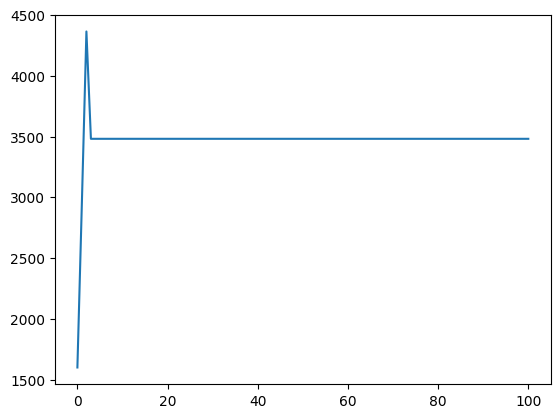

In [ ]:
from numpy.core.fromnumeric import shape
import numpy as np
import matplotlib.pyplot as plt

x11 = [-1, 1]
x22 = [-1, 0.5]
y1, y2 = [60, 20]
p = 0.005

b = [1, 1, 1]
c = 1

#initial random value of THETA(θ)
theta = [[1,-1,1,2,3,8,5,-3,3]]

#Temporary J(θ)
grad = []
gradient = []
inp1 =[1,-1,1,2,3,8,5,-3,3]
loss = [lxy(inp1, b, c, x11, y1)]

for i in range(100):
  grad = np.add(Ltheta(inp1, b, c, x11, y1), Ltheta(inp1, b, c, x22, y2)) #J(θ)=L(θ,x1,y1)+L(θ,x2,y2)
  gradient.append(grad)
  inp1 = np.subtract(inp1,[x * p for x in grad])
  loss.append(lxy(inp1, b, c, x11, y1))
  theta.append(inp1)

print(shape(gradient))
print(shape(theta))
print(theta[-1])


plt.plot(loss)
# plt.plot(gradient)